<a href="https://colab.research.google.com/github/nyota777/Principle-Component-Analysis/blob/main/Principal_Component_Analysis_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pricipal Component Analysis
*Principal Component Analysis* is used to reduce dimensionality by reducing the number of features in a dataset while retaining the most information.
Advantages include:
1. Noise reduction
2. data Compression
3. Outlier Detection

PCA focuses on capturing the variance for dimensionality reduction

# Implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def my_pca(X, n_components=2):

    X_centered = X - np.mean(X, axis=0)


    cov_matrix = np.cov(X_centered.T)

    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Step 4: Sort by descending eigenvalues
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]

    # Step 5: Select top n_components
    components = eigenvectors[:, :n_components]
    X_projected = X_centered @ components
    explained_variance = eigenvalues[:n_components]

    return X_projected, components, explained_variance


## Testing and Visualisation

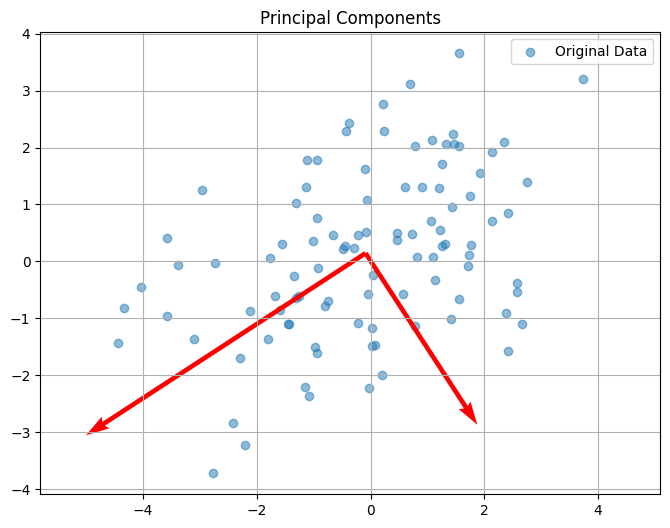

In [ ]:
# Generate synthetic data
np.random.seed(0)
mean = [0, 0]
cov = [[3, 1], [1, 2]]
X = np.random.multivariate_normal(mean, cov, 100)

# Apply PCA
X_pca, components, variance = my_pca(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')
origin = np.mean(X, axis=0)
for length, vector in zip(variance, components.T):
    v = vector * np.sqrt(length) * 3
    plt.quiver(*origin, *v, angles='xy', scale_units='xy', scale=1, color='r')
plt.title("Principal Components")
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()


## Implementation of the Iris Dataset

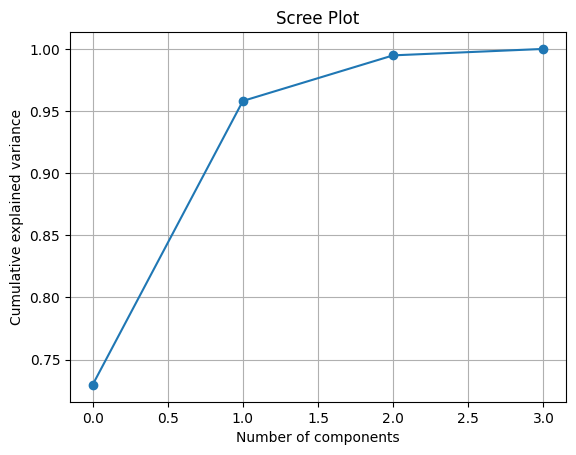

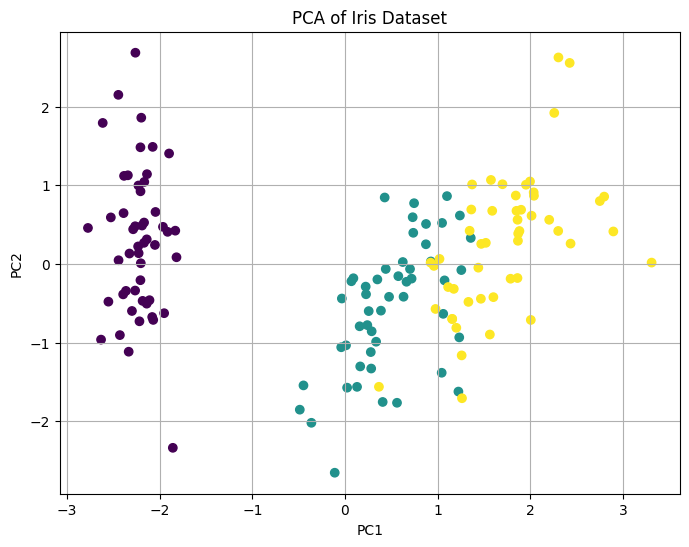

PC1 Loadings: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
PC2 Loadings: [0.37741762 0.92329566 0.02449161 0.06694199]


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.title("Scree Plot")
plt.show()

# 2D Plot
pca_2 = PCA(n_components=2)
X_2d = pca_2.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris Dataset')
plt.grid()
plt.show()

# Loadings
loadings = pca_2.components_
print("PC1 Loadings:", loadings[0])
print("PC2 Loadings:", loadings[1])


## Dimensional Data

Components to explain 90% variance: 238


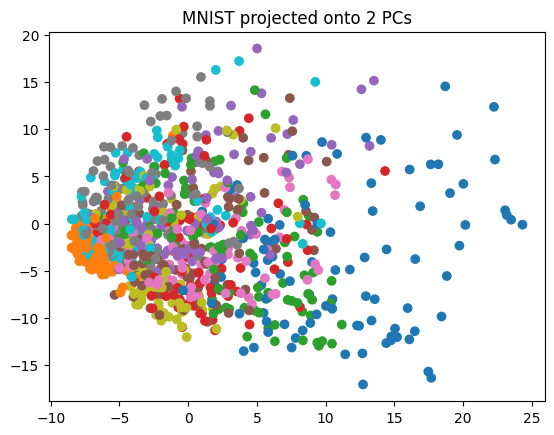

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X_mnist = mnist.data / 255.0

# Standardize
X_scaled = StandardScaler().fit_transform(X_mnist)

# PCA
pca = PCA(0.9)
X_reduced = pca.fit_transform(X_scaled)
print(f"Components to explain 90% variance: {pca.n_components_}")

# 2D Plot
pca_2d = PCA(n_components=2)
X_mnist_2d = pca_2d.fit_transform(X_scaled)
plt.scatter(X_mnist_2d[:1000, 0], X_mnist_2d[:1000, 1], c=mnist.target[:1000].astype(int), cmap='tab10')
plt.title("MNIST projected onto 2 PCs")
plt.show()


## Image Compression

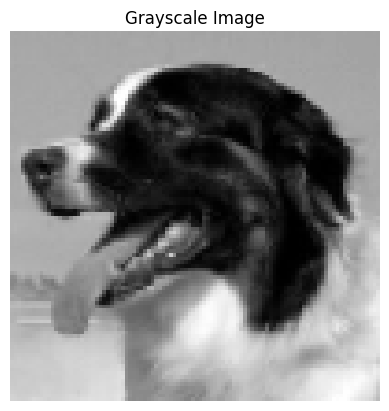

In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.pyplot as plt

# Working image URL
img_url = 'https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png'

# Load, resize, and convert to grayscale
img = rgb2gray(resize(imread(img_url), (100, 100)))

plt.imshow(img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


## Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, mnist.target, test_size=0.2)

# Original classifier
clf_orig = RandomForestClassifier()
clf_orig.fit(X_train, y_train)
print("Original accuracy:", accuracy_score(y_test, clf_orig.predict(X_test)))

# PCA classifier
for n in [10, 50, 100]:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf_pca = RandomForestClassifier()
    clf_pca.fit(X_train_pca, y_train)
    acc = accuracy_score(y_test, clf_pca.predict(X_test_pca))
    print(f"{n} PCs -> Accuracy: {acc:.4f}")


Original accuracy: 0.9683571428571428
10 PCs -> Accuracy: 0.9020
50 PCs -> Accuracy: 0.9433
100 PCs -> Accuracy: 0.9433


### Kernel PCA

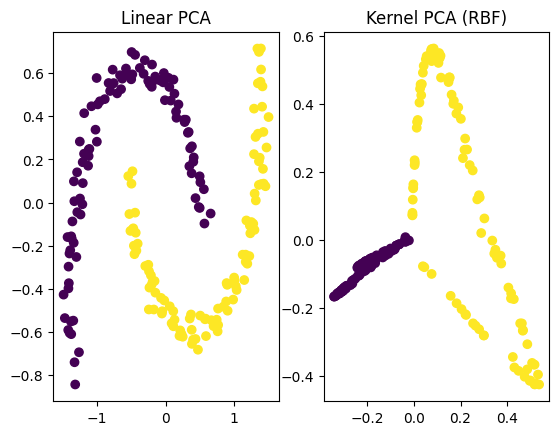

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05)

kpca = KernelPCA(kernel='rbf', gamma=15, n_components=2)
X_kpca = kpca.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.title("Linear PCA")
plt.subplot(1,2,2)
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y)
plt.title("Kernel PCA (RBF)")
plt.show()


## Difference between kernel and standard PCA.

Kernel is used for non-linear data wheras standard is used for linear data.